<a href="https://colab.research.google.com/github/takumi0427/PythonPractice/blob/master/P04_matplotlib_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practice04 グラフ可視化

##Matplotlib
グラフを作成  
日本語適用  
(https://qiita.com/knknkn1162/items/be87cba14e38e2c0f656)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

##ファイルIO設定

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls /content/gdrive/My Drive/Colab Notebooks
os.chdir("/content/gdrive/My Drive/Colab Notebooks/")
os.getcwd()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
ls: cannot access '/content/gdrive/My': No such file or directory
ls: cannot access 'Drive/Colab': No such file or directory
ls: cannot access 'Notebooks': No such file or directory


'/content/gdrive/My Drive/Colab Notebooks'

In [0]:
#テーマ変更
plt.style.use('default')#これが一番無難
plt.rcParams.update({'font.size':10})
# plt.rcParams['font.family'] = "IPAexGothic" #日本語
plt.rcParams['font.family'] = 'sans-serif'  #英語のみ

## Pyplotインターフェース subplotによる複数描画
複数のグラフを簡易に描画  
参考URL  
https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9

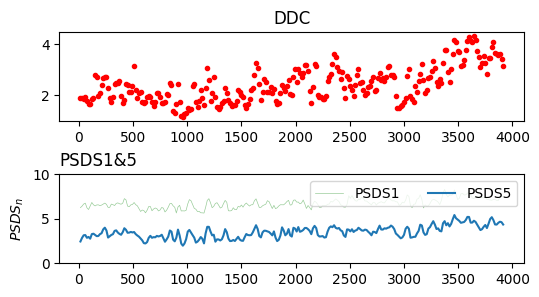

In [0]:
df0 = pd.read_csv('data/route01.csv')
df0 = df0[df0.route=="M"]
dfm = df0.groupby(['route', 'section']).mean()


#初期化　サイズ，解像度を指定(印刷なら200くらい)
plt.figure(figsize=(6, 3), dpi=100)
#複数グラフを配置する場合，その余白を指定．
plt.subplots_adjust(wspace=0.4,hspace=0.6)

#1番目のグラフ
plt.subplot(2,1,1)
plt.plot(dfm.meter, #x
         dfm.DDC,   #y
         "r."       #色とプロット種別
        )
plt.title("DDC")

#2番目のグラフ
plt.subplot(2,1,2)
#1つ目の系列
plt.plot(dfm.meter,           #x
         np.log(dfm.PSDS1),   #y
         color     = 'green', #プロットカラー
         linestyle = 'solid', #塗りつぶし設定
         alpha     = 0.4,     #透明度
         linewidth = 0.5,     #線の太さ
         label     = "PSDS1"  #凡例用ラベル
        )
#2つ目の系列
plt.plot(dfm.meter,np.log(dfm.PSDS5),label="PSDS5")
#以下，このグラフの設定
plt.ylim([0,10])
plt.ylabel("$\it{PSDS}_{n}$")
plt.legend(loc="upper right",ncol=2) #凡例
plt.title("PSDS1&5",loc="left")

#上記全グラフを画像保存（余白を削る）
#Wordファイルでレジュメ作成する際には，この画像を「リンク貼り付け」，F9で都度更新すると便利．
plt.savefig("results/Fig01.png",transparent = False, bbox_inches = 'tight', pad_inches = 0)


##オブジェクト指向インターフェースax.plot  
figureインスタンスを明言してプロットする  
より細かい設定が可能  
2軸グラフなども  
https://qiita.com/KntKnk0328/items/5ef40d9e77308dd0d0a4  
http://bicycle1885.hatenablog.com/entry/2014/02/14/023734

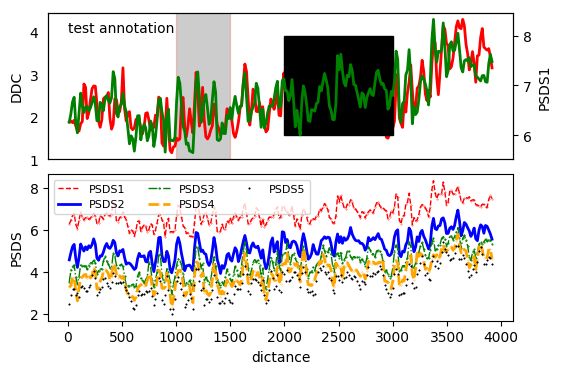

In [0]:
#インスタンス 
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex=ax1) #sharex,sharey 軸範囲間隔を統一

#1番目のグラフ
#第2軸の設定
ax3 = ax1.twinx()
ax1.plot(dfm.meter, dfm.DDC, linewidth=2,color="red")
ax3.plot(dfm.meter, np.log(dfm.PSDS1),linewidth=2,color="green")
ax1.set_ylabel('DDC')
ax3.set_ylabel('PSDS1')
ax1.text(0,4,"test annotation")
ax1.add_patch(plt.Rectangle(xy=(1000, 0),width=500,height=10,fill=True,alpha=0.2,fc="black",ec="red",linewidth = 1))
ax3.add_patch(plt.Rectangle(xy=(2000, 6),width=1000,height=2,fill=True,alpha=1.0,fc="black",ec="black",linewidth = 1))
ax1.tick_params(labelbottom=False,labelleft=True,labelright=False,labeltop=False)
ax1.tick_params(bottom=False,left=False,right=False,top=False)

#2番目のグラフ
col = ["red","blue","green","orange","black"]
lwd = [1,2,1,2,0,5]
lst = ['dashed','solid','dashdot','dashed','dashed']
mak = [".", "", "o", ".", "s"]
for i in range(5):
  ax2.plot(dfm.meter,
           np.log(dfm["PSDS"+str(i+1)]),
           linewidth  = lwd[i],
           color      = col[i],
           linestyle  = lst[i],
           marker     = mak[i],
           markersize = 0.5)
ax2.set_title('')
ax2.set_xlabel('dictance',size=10)
ax2.set_ylabel('PSDS',size=10)
ax2.tick_params(labelbottom=True,labelleft=True,labelright=False,labeltop=False)
ax2.tick_params(bottom=True,left=True,right=False,top=False)
ax2.legend(ncol=3,fontsize=8)

# サブプロット間の空白を調整
plt.subplots_adjust(wspace=0, hspace=0.1)
fig.show()

##アニメーション作成

MovieWriter imagemagick unavailable. Trying to use pillow instead.


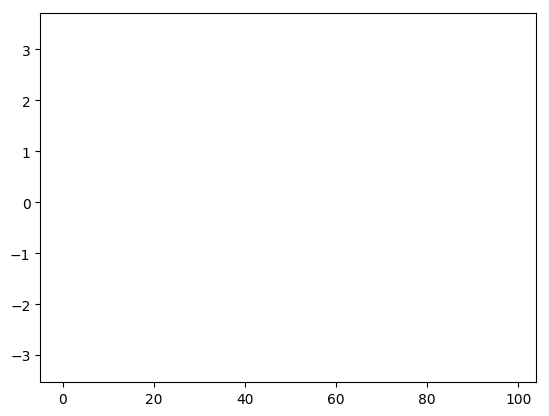

In [0]:
import matplotlib.animation as animation

fig = plt.figure()
ims = []
for i in range(10):
        rand = np.random.randn(100)     # 100個の乱数を生成
        im = plt.plot(rand)             # 乱数をグラフにする
        ims.append(im)                  # グラフを配列 ims に追加
# 10枚のプロットを 1000ms ごとに表示
ani = animation.ArtistAnimation(fig, ims, interval=1000)
ani.save("results/output.gif", writer="imagemagick")